In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [43]:
file_names = glob.glob("../OFC_data/v7*Spectra*mA_Freq*.pkl")
IMG_DIR = "./images/dataset_summary_statistics"
os.makedirs(IMG_DIR, exist_ok=True)
file_names[0]

'../OFC_data/v7_EC142_TimeAveragedSpectraPower_6mA_FreqBands.pkl'

In [15]:
file_names

['../OFC_data/v7_EC142_TimeAveragedSpectraPower_6mA_FreqBands.pkl',
 '../OFC_data/v7_EC129_TimeAveragedSpectraPower_6mA_FreqBands.pkl',
 '../OFC_data/v7_EC105_TimeAveragedSpectraPower_6mA_FreqBands.pkl',
 '../OFC_data/v7_EC105_TimeAveragedSpectraPower_1mA_FreqBands.pkl',
 '../OFC_data/v7_EC137_TimeAveragedSpectraPower_6mA_FreqBands.pkl',
 '../OFC_data/v7_EC137_TimeAveragedSpectraPower_1mA_FreqBands.pkl',
 '../OFC_data/v7_EC133_TimeAveragedSpectraPower_6mA_FreqBands.pkl',
 '../OFC_data/v7_EC152_TimeAveragedSpectraPower_1mA_FreqBands.pkl',
 '../OFC_data/v7_EC108_TimeAveragedSpectraPower_6mA_FreqBands.pkl',
 '../OFC_data/v7_EC108_TimeAveragedSpectraPower_1mA_FreqBands.pkl',
 '../OFC_data/v7_EC133_TimeAveragedSpectraPower_1mA_FreqBands.pkl',
 '../OFC_data/v7_EC125_TimeAveragedSpectraPower_6mA_FreqBands.pkl',
 '../OFC_data/v7_EC125_TimeAveragedSpectraPower_1mA_FreqBands.pkl',
 '../OFC_data/v7_EC153_TimeAveragedSpectraPower_6mA_FreqBands.pkl',
 '../OFC_data/v7_EC151_TimeAveragedSpectraPower_

In [50]:
data = {
    "power_dim": [],
    "time_steps": [],
    "stim_start": [],
    "stim_end": [],
    "stim_steps": [],
    "stim_steps_ratio": [],
}
for fi in file_names:
    with open(f"{fi}", "rb") as f:
        curr = np.load(f, allow_pickle=True).item()
        curr_pow = curr["power_stim"]
        data["power_dim"].append(curr_pow.shape[0])
        data["time_steps"].append(curr_pow.shape[2])
        data["stim_start"].append(int(1.0 * curr["stimStartSample"]))
        data["stim_end"].append(int(1.0 * curr["stimEndSample"]))
        data["stim_steps"].append(data["stim_end"][-1] - data["stim_start"][-1])
        data["stim_steps_ratio"].append(data["stim_steps"] / data["time_steps"])

In [55]:
data["stim_steps_ratio"] = []
for i in range(len(data["power_dim"])):
    data["stim_steps_ratio"] = data["stim_steps"][i] / data["time_steps"][i]

In [62]:
print(f"Ratio stim / total: {np.round(data['stim_steps_ratio'], 3)}")

Ratio stim / total: 0.746


In [52]:
data["power_dim"], len(data["power_dim"])

([12, 8, 18, 20, 17, 17, 42, 8, 8, 8, 60, 17, 19, 16, 6], 15)

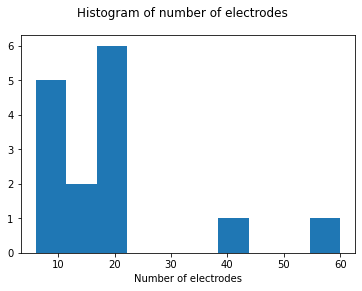

In [46]:
fig, ax = plt.subplots()
ax.hist(data["power_dim"])
ax.set_xlabel("Number of electrodes")
title = "Histogram of number of electrodes"
fig.suptitle(title)
fig.savefig(
    f"{IMG_DIR}/{title.replace(' ', '_')}.png", transparent=False, facecolor="white"
)

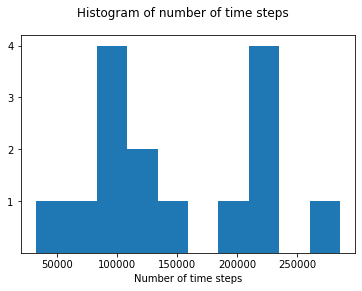

In [47]:
fig, ax = plt.subplots()
ax.hist(data["time_steps"])
ax.set_xlabel("Number of time steps")
ax.set_yticks(np.arange(1, 5))
title = "Histogram of number of time steps"
fig.suptitle(title)
fig.savefig(
    f"{IMG_DIR}/{title.replace(' ', '_')}.png", transparent=False, facecolor="white"
)

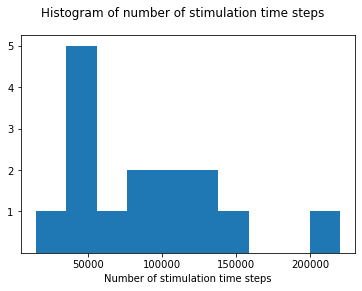

In [54]:
fig, ax = plt.subplots()
ax.hist(data["stim_steps"])
ax.set_xlabel("Number of stimulation time steps")
ax.set_yticks(np.arange(1, 6))
title = "Histogram of number of stimulation time steps"
fig.suptitle(title)
fig.savefig(
    f"{IMG_DIR}/{title.replace(' ', '_')}.png", transparent=False, facecolor="white"
)

In [35]:
print(f"Range of freq bins: [{np.min(data['power_dim'])}, {np.max(data['power_dim'])}]")
print("Average of freq bins: ", np.mean(data["power_dim"]))
print(
    f"Range of time steps: [{np.min(data['time_steps'])}, {np.max(data['time_steps'])}]"
)
print("Average of time steps: ", int(np.mean(data["time_steps"])))
print(f"Num data files: {len(data['power_dim'])}")

Range of freq bins: [6, 60]
Average of freq bins:  18.4
Range of time steps: [32064, 285635]
Average of time steps:  150509
Num data files: 15
